Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


C:\Users\Surve Srivalli\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


Dataset Paths

In [2]:
train_dir = "OneDrive/Documents/face_detection_dataset/data/train"
val_dir   = "OneDrive/Documents/face_detection_dataset/data/val"
test_dir  = "OneDrive/Documents/face_detection_dataset/data/test"


Data Preprocessing

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)


Load Dataset

In [4]:
training_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48,48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical'
)

validation_set = test_datagen.flow_from_directory(
    val_dir,
    target_size=(48,48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical'
)


Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


Build CNN architecture

In [5]:
cnn = Sequential()

cnn.add(Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)))
cnn.add(MaxPooling2D(2,2))

cnn.add(Conv2D(64, (3,3), activation='relu'))
cnn.add(MaxPooling2D(2,2))

cnn.add(Conv2D(128, (3,3), activation='relu'))
cnn.add(MaxPooling2D(2,2))

cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))

cnn.add(Dense(7, activation='softmax'))


C:\Users\Surve Srivalli\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile Model

In [6]:
cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


Train CNN

In [7]:
history = cnn.fit(
    training_set,
    validation_data=validation_set,
    epochs=40
)


Epoch 1/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 116s 124ms/step - accuracy: 0.2929 - loss: 1.7418 - val_accuracy: 0.3853 - val_loss: 1.5732
Epoch 2/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 89s 99ms/step - accuracy: 0.3930 - loss: 1.5599 - val_accuracy: 0.4547 - val_loss: 1.4022
Epoch 3/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 135s 91ms/step - accuracy: 0.4360 - loss: 1.4689 - val_accuracy: 0.4926 - val_loss: 1.3406
Epoch 4/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 91s 102ms/step - accuracy: 0.4598 - loss: 1.4141 - val_accuracy: 0.5082 - val_loss: 1.2959
Epoch 5/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 102s 114ms/step - accuracy: 0.4800 - loss: 1.3667 - val_accuracy: 0.5247 - val_loss: 1.2640
Epoch 6/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 149s 122ms/step - accuracy: 0.4902 - loss: 1.3357 - val_accuracy: 0.5166 - val_loss: 1.2585
Epoch 7/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 128s 143ms/step - accuracy: 0.5059 - loss: 1.3080 - val_accuracy: 0.5378 - val_loss: 1.2227
Epoch 8/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 107s 104ms/step - accuracy: 0.5101 - los

save model

In [8]:
cnn.save("emotion_model.h5")
print("emotion_model.h5 saved successfully")


emotion_model.h5 saved successfully


Accuracy

In [11]:
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48,48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical'
)

loss, acc = cnn.evaluate(test_set)
print("Test Accuracy:", acc)


Found 3589 images belonging to 7 classes.
113/113 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - accuracy: 0.5851 - loss: 1.1037
Test Accuracy: 0.585121214389801


C:\Users\Surve Srivalli\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


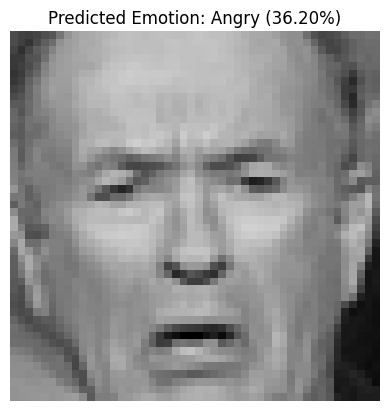

Predicted Emotion: Angry
Confidence Scores: [[0.36200857 0.1477972  0.28294867 0.00065225 0.13738766 0.05442512
  0.01478056]]


In [1]:
# ================================
# Single Image Emotion Prediction
# (One-cell notebook version)
# ================================

import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# 1. Load trained model
model = load_model("emotion_model.h5")

# 2. Emotion labels
emotion_labels = {
    0: "Angry",
    1: "Disgust",
    2: "Fear",
    3: "Happy",
    4: "Sad",
    5: "Surprise",
    6: "Neutral"
}

# 3. Image path (CHANGE THIS)
image_path = "OneDrive/Documents/face_detection_dataset/data/test/1/32476.png"

# 4. Read image
img = cv2.imread(image_path)

# Safety check
if img is None:
    raise ValueError("Image not found. Check image path.")

# Convert for display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 5. Preprocess image (same as training)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray, (48, 48))
gray = gray / 255.0
gray = np.reshape(gray, (1, 48, 48, 1))

# 6. Predict emotion
prediction = model.predict(gray, verbose=0)
emotion_index = np.argmax(prediction)
emotion = emotion_labels[emotion_index]
confidence = np.max(prediction) * 100

# 7. Show result
plt.imshow(img_rgb)
plt.title(f"Predicted Emotion: {emotion} ({confidence:.2f}%)")
plt.axis("off")
plt.show()

print("Predicted Emotion:", emotion)
print("Confidence Scores:", prediction)